<a href="https://colab.research.google.com/github/Karishma-Kuria/CMPE-255-Various-Clustering-Techniques/blob/main/Various_Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Various Clustering Techniques**

## K-Means Clustering

In [5]:
# Importing all relevant libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Loading the dataset from github

In [6]:
# The dataset which I have used is uploaded in the below git-repo
dataset_path = 'https://github.com/Karishma-Kuria/CMPE-255-Various-Clustering-Techniques/blob/main/LoanDetail.csv?raw=true'
loan_ds = pd.read_csv(dataset_path, header=0)
loan_ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Visualizing the data

In [28]:
data = loan_ds.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)


,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


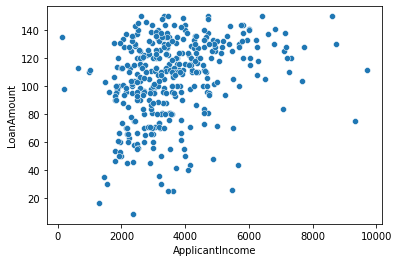

In [37]:
X = data.values
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

## Encoding Categorical values

Since K-mean only works with numerical data and not all the features can be represented into numerical form. So in this case I will be working with 2 features which are **ApplicantIncome** and **LoanAmount**.

In [32]:
# For number of clusters = 3
kmean = KMeans(n_clusters=3)
y_predicted = kmean.fit_predict(loan_ds[['ApplicantIncome','LoanAmount']])
y_predicted

array([2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2,

In [ ]:
loan_ds['cluster']=y_predicted
loan_ds.head()

In [35]:
# Printing centroids for the 3 clusters
kmean.cluster_centers_

array([[2497.97252747,   97.47252747],
       [6512.76744186,  119.48837209],
       [4033.59615385,  109.75641026]])

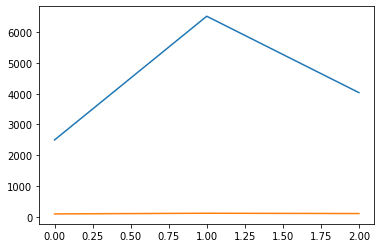

In [36]:
# Visualizing the centroids
plt.plot(kmean.cluster_centers_)

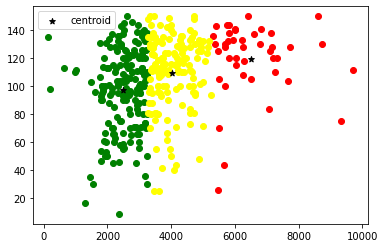

In [43]:
data_frame1 = loan_ds[loan_ds.cluster==0]
data_frame2 = loan_ds[loan_ds.cluster==1]
data_frame3 = loan_ds[loan_ds.cluster==2]
plt.scatter(data_frame1.ApplicantIncome,data_frame1['LoanAmount'],color='green')
plt.scatter(data_frame2.ApplicantIncome,data_frame2['LoanAmount'],color='red')
plt.scatter(data_frame3.ApplicantIncome,data_frame3['LoanAmount'],color='yellow')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

## Elbow Plot

This method is used to define the value for number of clusters which is k

In [45]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(loan_ds[['ApplicantIncome','LoanAmount']])
    sse.append(km.inertia_)

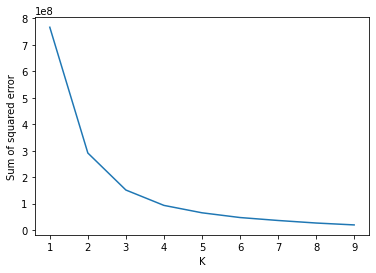

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Since the Sum of the squared error does not reduce much after 4 so we can set k=4 here.

We can also define the kmean function as shown below:

In [69]:
import random
def kmeans_algo(X, k):
  
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


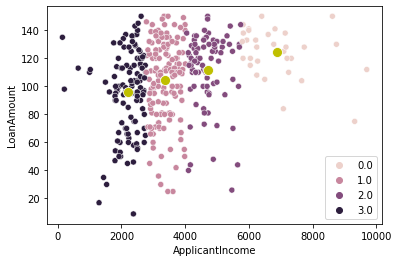

In [70]:
# Since we have already calculated the value of k above we can apply kmean
k = 4
centroids, cluster = kmeans_algo(X, k)
# Plotting the centroids along with clusters
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

In the above figure all the four colors represent 4 clusters and the green color represents the 4 centroids.

# Hierarchical clustering

In [76]:
# I have used the same dataset as before
dataset = loan_ds.loc[:, ['ApplicantIncome', 'LoanAmount']]
from sklearn.preprocessing import normalize
data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,ApplicantIncome,LoanAmount
0,0.999610,0.027918
1,0.999758,0.021995
2,0.998923,0.046408
3,0.999724,0.023494
4,0.999172,0.040686


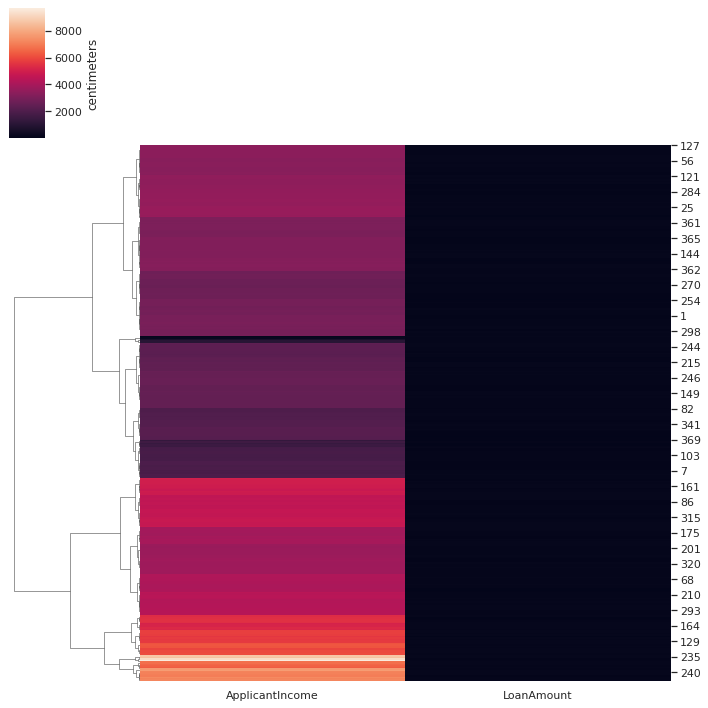

In [93]:
import seaborn as sns; sns.set(color_codes=True)
sns.clustermap(data, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'});
#plt.scatter(data_scaled['ApplicantIncome'], data_scaled['LoanAmount'], c=cluster.labels_) 

## From the above heat map it is clear that there are 2 clusters.

## I have also drawn a dendogram to decide the number of clusters for the dataset with the above 2 features.

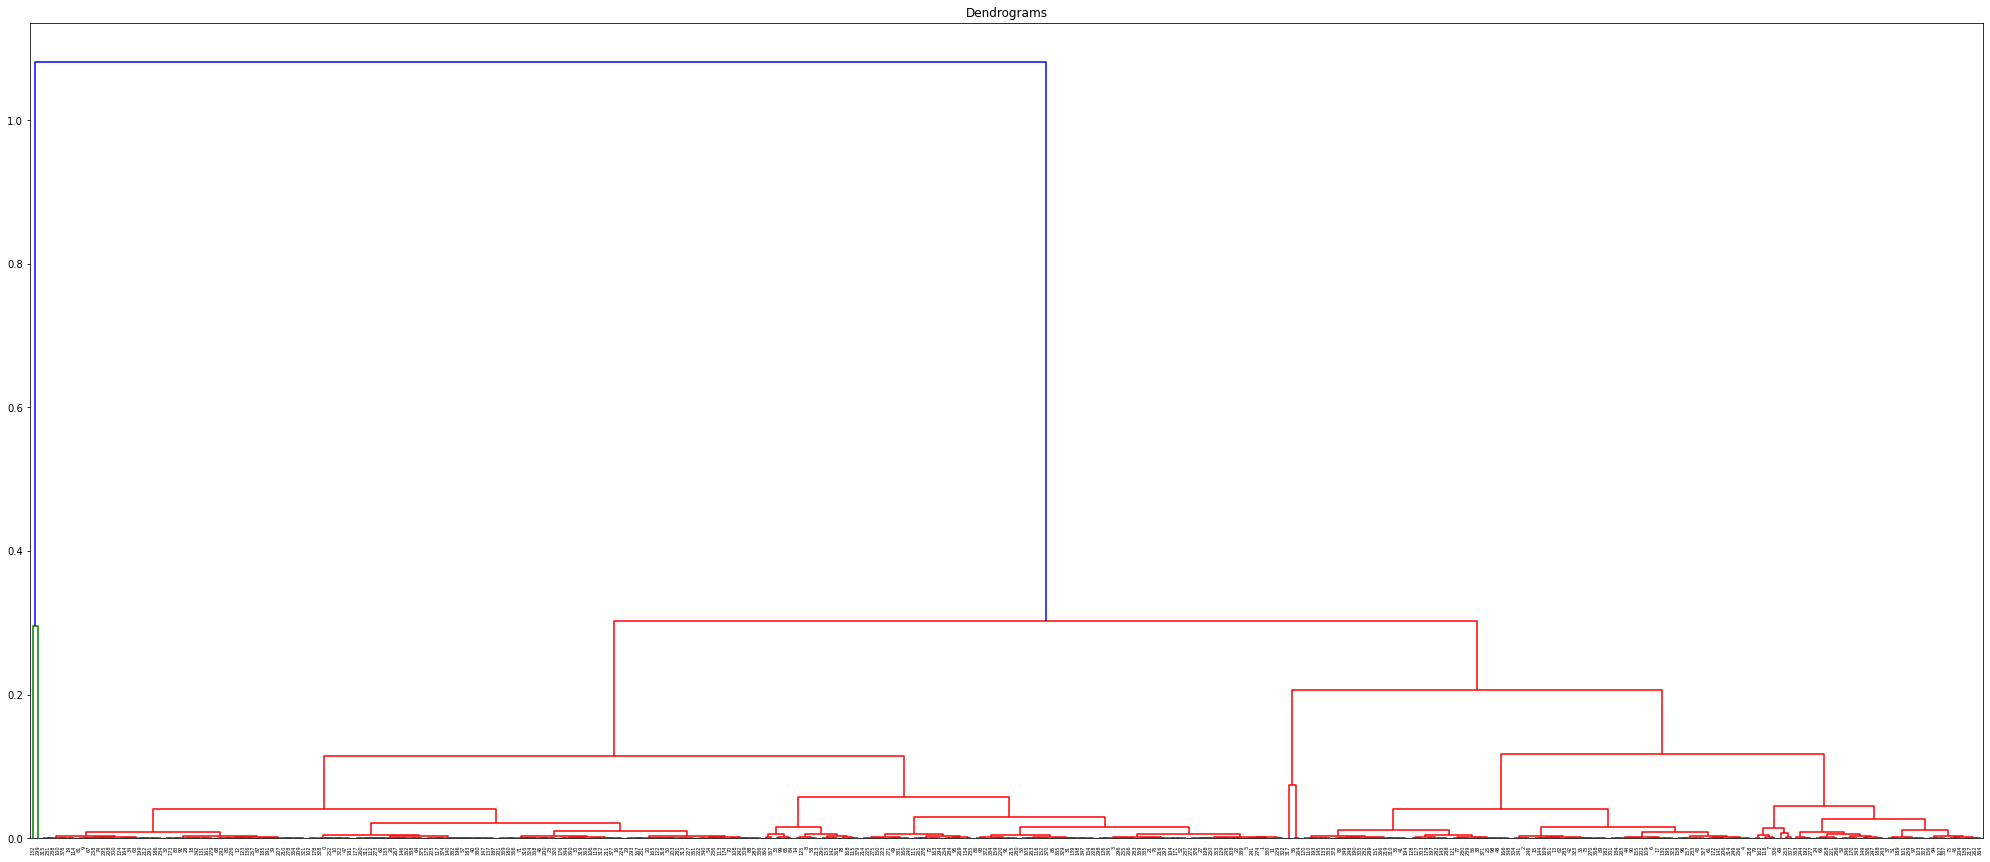

In [83]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(35, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

## In the above graph the x-axis contains the sample and the y-axis contains the distance between each samples. Also the line with maximum distance in the graph is the blue line and hence we can cut the above dendogram at 0.4.

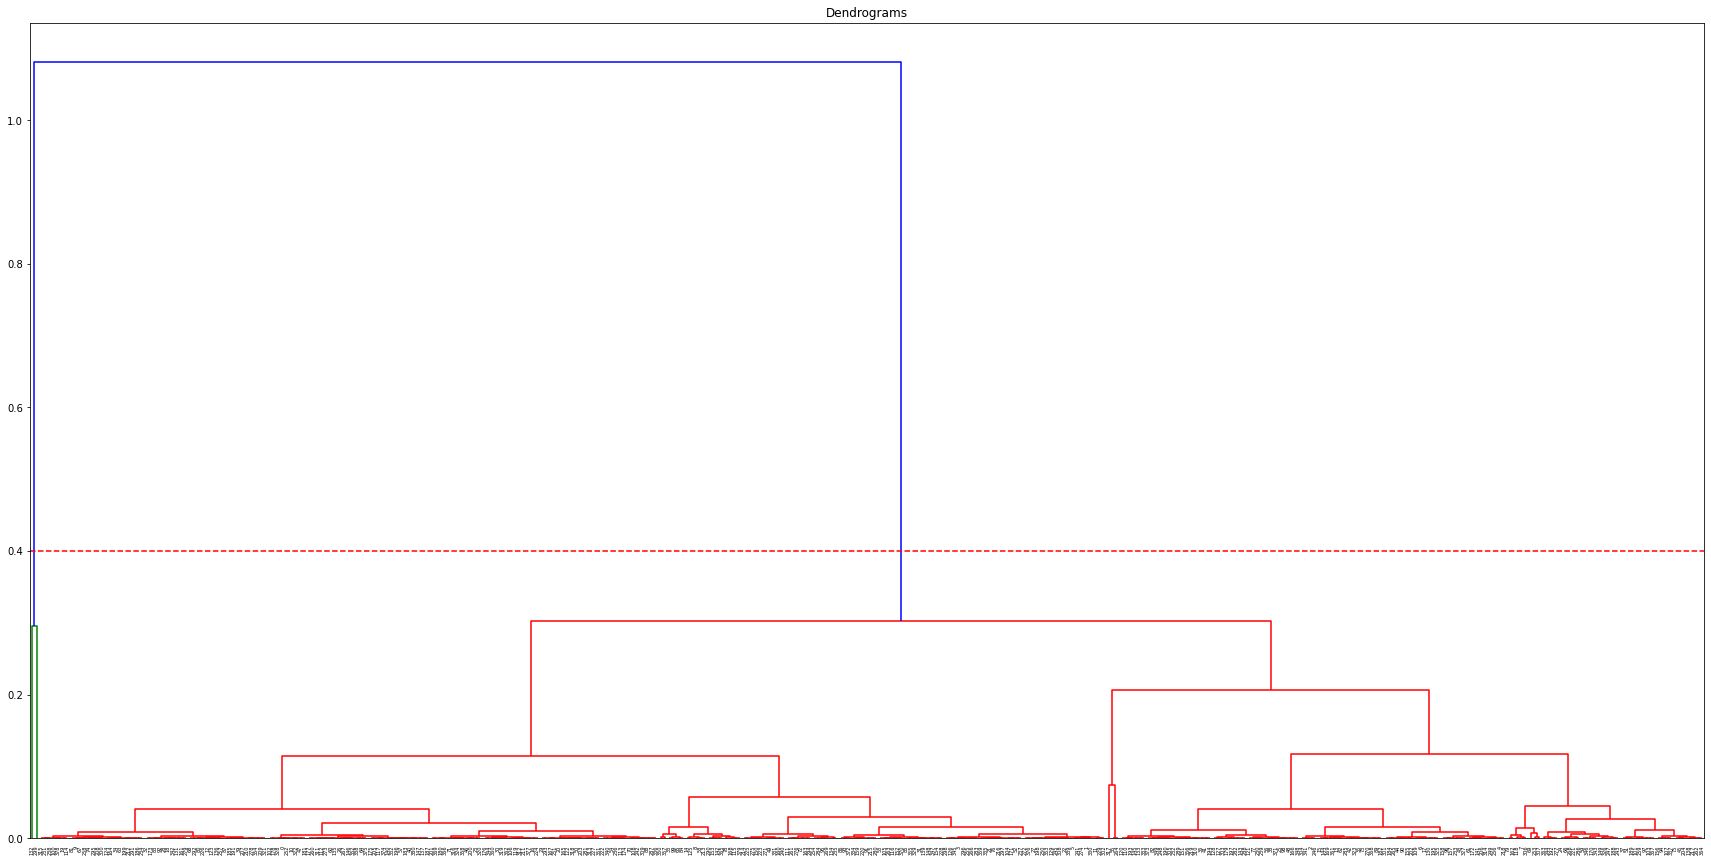

In [85]:
plt.figure(figsize=(30, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.4, color='r', linestyle='--')

## So as per the above graph this line cuts the dendogram into 2 parts, so number of clusters = 2.

In [86]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clusters.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

# **Gaussian mixture models clustering (not from scratch)**

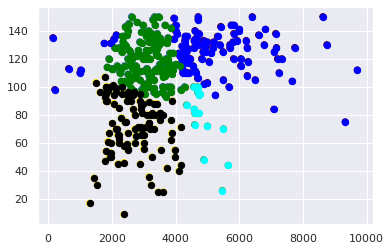

In [113]:
import sklearn.mixture
from sklearn.mixture import GaussianMixture
data = loan_ds.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)
X = data.values
gmm = GaussianMixture(n_components=4).fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k],s=40,cmap='viridis')
plt.show()

### GMM is a probabilistic model so it is possible to calculate the probability of the cluster assignment. In Scikit Learn we use the predict_proba method for this. It returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

In [115]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.718 0.163 0.11  0.009]
 [0.    0.03  0.    0.969]
 [0.21  0.61  0.    0.18 ]
 [0.999 0.001 0.    0.   ]
 [0.044 0.376 0.    0.581]]


Visualizing uncertainty: by making the size of each point proportional to the certainty of its prediction

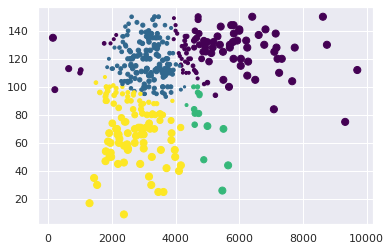

In [116]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

Looking at the above figure, it's clear that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment.

# DB Scan Clustering (not from scratch) using pycaret library 

In [1]:
# Installing Pycaret
!pip install pycaret

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [7]:
# I am using the same dataset as used in the above techniques
loan_ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [9]:
loan_ds.shape

(381, 13)

In order to demonstrate the predict_model() function on unseen data, a sample of 5% (54 records) has been withheld from the original dataset to be used for predictions at the end of experiment. This should not be confused with train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 54 samples were not available at the time when this experiment was performed.

In [10]:
data = loan_ds.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_notused = loan_ds.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_notused.shape))

Data for Modeling: (362, 13)
Unseen Data For Predictions: (19, 13)


## Setting up Environment in PyCaret

In [11]:
from pycaret.clustering import *

In [12]:
test = setup(data, normalize = True, 
                   ignore_features = ['Loan_ID'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(362, 13)"
2,Missing Values,True
3,Numeric Features,3
4,Categorical Features,9
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(362, 32)"
9,CPU Jobs,-1


## Creating Model

In [14]:
dbscan = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1587,2.6338,1.7923,0,0,0


In [15]:
print(dbscan)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)


In [17]:
dbscanmode = create_model('dbscan', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1587,2.6338,1.7923,0,0,0


In [18]:
print(dbscanmode)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)


## Assign Model

In [19]:
dbscan_results = assign_model(dbscanmode)
dbscan_results.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster
0,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N,Cluster -1
1,LP001798,Male,Yes,2,Graduate,No,5819,5000.0,120.0,360.0,1.0,Rural,Y,Cluster -1
2,LP001778,Male,Yes,1,Graduate,No,3155,1779.0,140.0,360.0,1.0,Semiurban,Y,Cluster -1
3,LP001532,Male,Yes,2,Not Graduate,No,2281,0.0,113.0,360.0,1.0,Rural,N,Cluster -1
4,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural,N,Cluster -1


In [20]:
dbscan_results.shape

(362, 14)

Note that a new column called Cluster has been added to the original dataset. dbscan_results also includes the Losn_ID feature that we dropped during the setup() but it was not used for the model and is only appended to the dataset when we use assign_model().

## Visualizing Model

In [21]:
plot_model(dbscanmode)

## Distribution Plot

In [24]:
plot_model(dbscanmode, plot = 'distribution')

In [26]:
plot_model(dbscanmode, plot = 'distribution', feature = 'ApplicantIncome')

In [28]:
plot_model(dbscanmode, plot = 'distribution', feature = 'LoanAmount')

## Predict on unused data

In [ ]:
unused_predictions = predict_model(dbscanmode, data=data_notused)
unused_predictions.head()

## Saving the Model

In [30]:
save_model(dbscanmode,'Final DBSCAN Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Loan_ID'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numer...
                 ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
         

## Loading the saved model

In [31]:
saved_dbscan = load_model('Final DBSCAN Model')

Transformation Pipeline and Model Successfully Loaded
